Problem statement: Yulu has recently suffered considerable dips in its revenues. They want to understand the factors affecting the demand for these shared electric cycles in the Indian market. With the help of Hypothesis Testing we are going to analyze the various factors affecting the usage of the their shared electric vehicles and what is their role in it. We are going to test various factors against the usage and see how statistically significant they are and how useful they can be in making business decisions. From the datatset, we can also check what factors contribute the most in making useful inferences.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_ind # Numeric Vs categorical
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)

from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import f_oneway # Numeric Vs categorical

In [3]:
yulu=pd.read_csv('C:/Prakruthi/DSML/YULU - Case study/bike_sharing.csv')

In [4]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#Checking if there are missing values:
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
yulu['workingday'].value_counts().sort_values(ascending=False)

1    7412
0    3474
Name: workingday, dtype: int64

In [7]:
yulu.groupby('workingday')['count'].sum()

workingday
0     654872
1    1430604
Name: count, dtype: int64

In [8]:
yulu['weather'].value_counts().sort_values(ascending=False)

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [9]:
yulu.groupby('weather')['count'].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [10]:
yulu['season'].value_counts().sort_values(ascending=False)

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [11]:
yulu.groupby('season')['count'].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [12]:
#converting working day, season and weather columns to object type from integer to procedd with the hypothesis testing
yulu["holiday"] = yulu["holiday"].astype('object')
yulu["workingday"] = yulu["workingday"].astype('object')
yulu["weather"] = yulu["weather"].astype('object')
yulu["season"] = yulu["season"].astype('object')

In [13]:
yulu.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-03 11:00:00,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


Some additional observations
1. By looking at the casual, registered and total count of rented vehicles we can see that are a outliers. 
We can check this further from plots
2. The mean is higher than the median which means the data is right skewed and there are outliers in the right side
of the distribution

# Univariate analysis

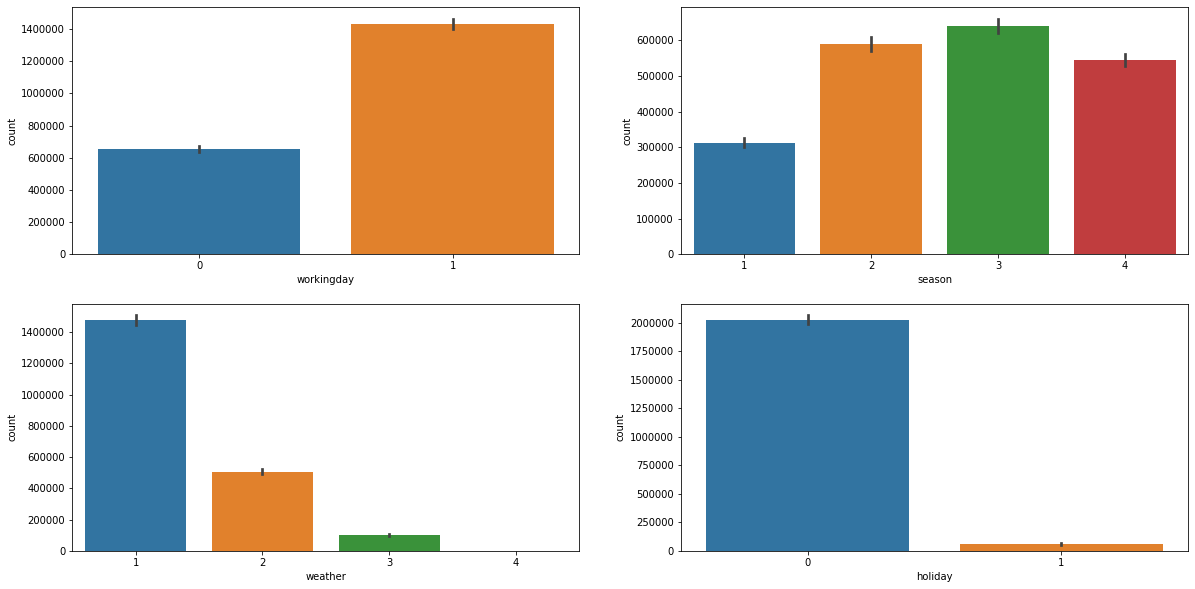

In [14]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.barplot(x = 'workingday',y = 'count',data = yulu,estimator = np.sum,ax=axis[0,0])
sns.barplot(x = 'season',y = 'count',data = yulu,estimator = np.sum,ax=axis[0,1])
sns.barplot(x = 'weather',y = 'count',data = yulu,estimator = np.sum,ax=axis[1,0])
sns.barplot(x = 'holiday',y = 'count',data = yulu,estimator = np.sum,ax=axis[1,1])

C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

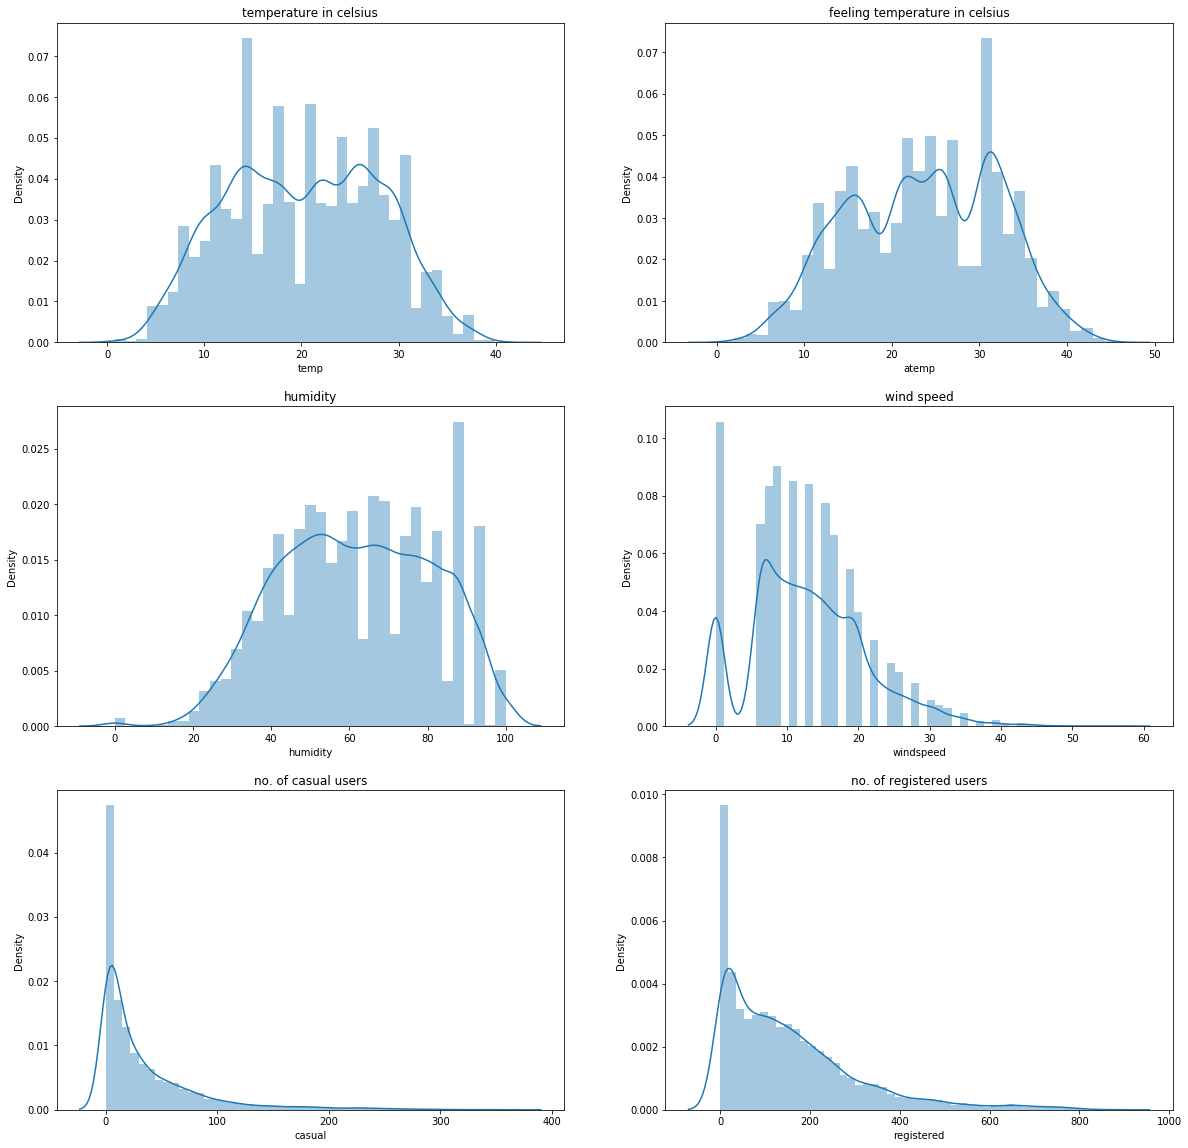

C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


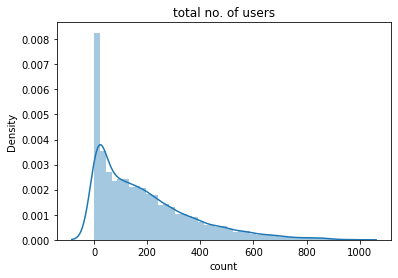

In [15]:
#data = pd.DataFrame(yulu['temp','atemp','humidity','windspeed','casual','registered'])
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
sns.distplot(yulu['temp'],ax=axis[0,0]).set_title('temperature in celsius')
sns.distplot(yulu['atemp'],ax=axis[0,1]).set_title('feeling temperature in celsius')
sns.distplot(yulu['humidity'],ax=axis[1,0]).set_title('humidity')
sns.distplot(yulu['windspeed'],ax=axis[1,1]).set_title('wind speed')
sns.distplot(yulu['casual'],ax=axis[2,0]).set_title('no. of casual users')
sns.distplot(yulu['registered'],ax=axis[2,1]).set_title('no. of registered users')
plt.show()
sns.distplot(yulu['count']).set_title('total no. of users')
plt.show()

# Bivariate analysis

Text(0.5, 1.0, 'count vs holiday')

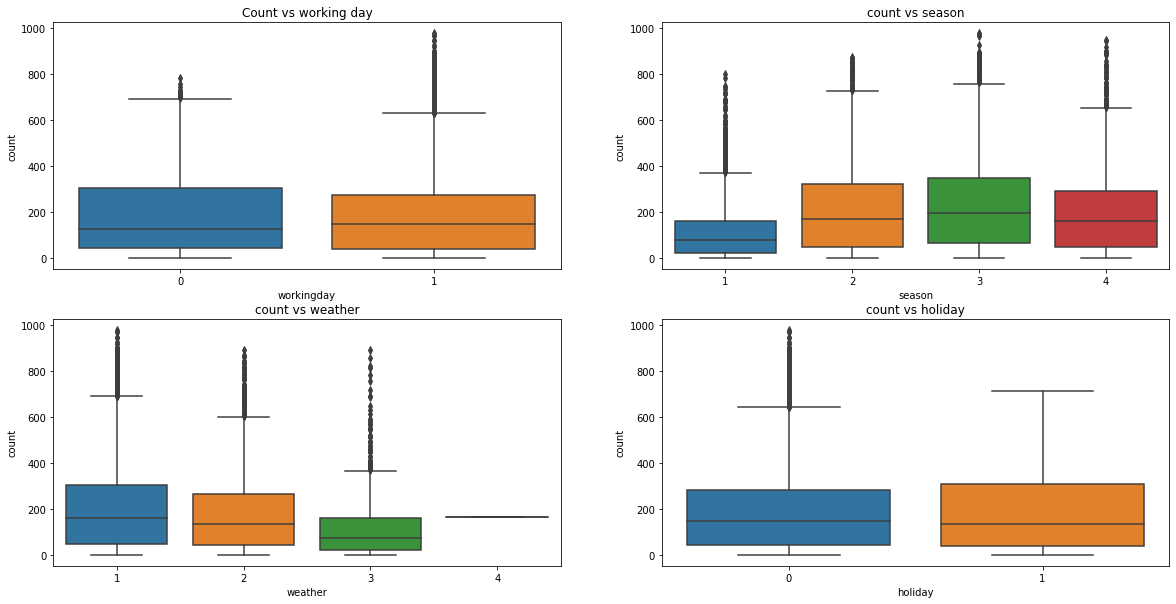

In [16]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.boxplot(data=yulu, y='count',x='workingday',ax=axis[0,0]).set_title('Count vs working day')
sns.boxplot(data=yulu, y='count',x='season',ax=axis[0,1]).set_title('count vs season')
sns.boxplot(data=yulu, y='count',x='weather',ax=axis[1,0]).set_title('count vs weather')
sns.boxplot(data=yulu, y='count',x='holiday',ax=axis[1,1]).set_title('count vs holiday')

# Hypothesis Testing

# Testing whether Working Day has effect on number of electric cycles rented

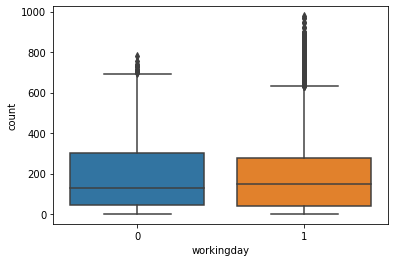

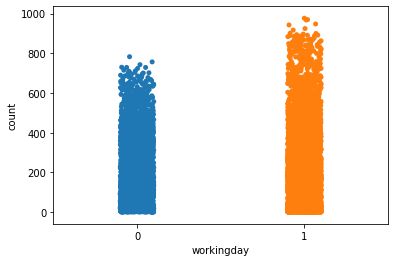

In [17]:
sns.boxplot(data=yulu, y='count',x='workingday')
plt.show()
sns.stripplot(y = yulu['count'], x = yulu['workingday'])
plt.show()

In [18]:
yulu.groupby(["workingday"])["count"].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

In [19]:
#create 2 samples - working and non-working days
yulu_working = yulu[yulu["workingday"]==1]
yulu_non_working = yulu[yulu["workingday"]==0]

In [20]:
# H0 : Working Day - the number of electric cycles rented on a working day is the same as a non-working day
# Ha : Working Day - the number of electric cycles rented on a working day is not equal to the number on a non-working day
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = ttest_ind(yulu_working["workingday"], yulu_non_working["workingday"],alternative='two-sided')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: inf
p value : 0.0
Reject H0


In [21]:
# H0 : Working Day - the number of electric cycles rented on a working day is the same as a non-working day
# Ha : Working Day - the number of electric cycles rented on a working day is greater than the number of cycles rented on a 
# non-working day
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = ttest_ind(yulu_working["workingday"], yulu_non_working["workingday"],alternative='greater')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: inf
p value : 0.0
Reject H0


In [22]:
# H0 : Working Day - the number of electric cycles rented on a working day is the same as a non-working day
# Ha : Working Day - the number of electric cycles rented on a working day is lesser than the number of cycles rented on a 
# non-working day
alpha = 0.05 # testing the null hypothesis at 95% confidence level
test_stat, p_value = ttest_ind(yulu_working["workingday"], yulu_non_working["workingday"],alternative='less')
print("test statistic:",test_stat)
print("p value :",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

test statistic: inf
p value : 1.0
Fail to reject H0


# Testing whether No. of cycles rented is similar or different in different weather

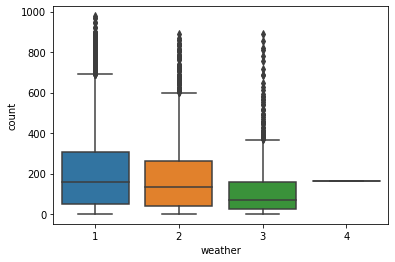

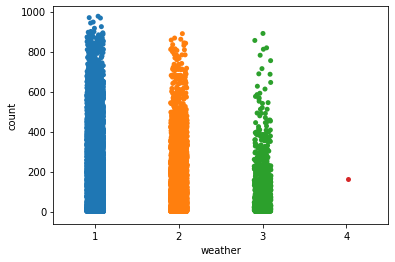

In [23]:
sns.boxplot(data=yulu, y='count',x='weather')
plt.show()
sns.stripplot(y = yulu['count'], x = yulu['weather'])
plt.show()

C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


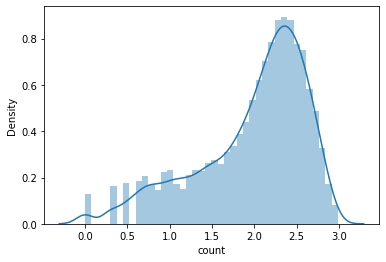

In [24]:
sample = np.log10(yulu['count'])
sns.distplot(sample)

In [25]:
weather_1 = yulu[yulu["weather"]==1]["count"]
weather_2 = yulu[yulu["weather"]==2]["count"]
weather_3 = yulu[yulu["weather"]==3]["count"]
weather_4 = yulu[yulu["weather"]==4]["count"]

In [26]:
f_stat, p_value = f_oneway(weather_1,weather_2,weather_3,weather_4) 
alpha = 0.05 # testing the null hypothesis at 95% confidence level
print("f_stat : ",f_stat)
print("p-value : ",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

f_stat :  65.53024112793271
p-value :  5.482069475935669e-42
Reject H0


# Testing whether No. of cycles rented is similar or different in different seasons

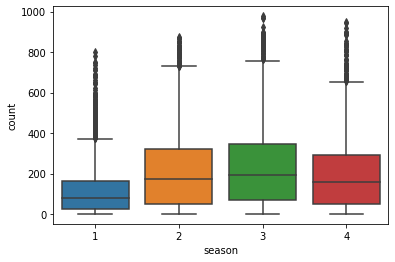

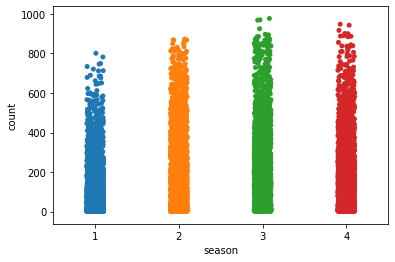

In [27]:
sns.boxplot(data=yulu, y='count',x='season')
plt.show()
sns.stripplot(y = yulu['count'], x = yulu['season'])
plt.show()

C:\Users\sanke\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


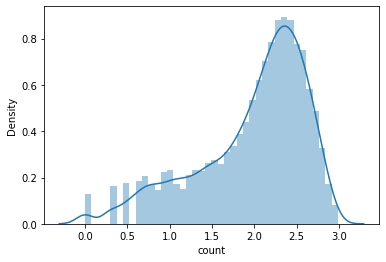

In [28]:
sample = np.log10(yulu['count'])
sns.distplot(sample)

In [29]:
season_1 = yulu[yulu["season"]==1]["count"]
season_2 = yulu[yulu["season"]==2]["count"]
season_3 = yulu[yulu["season"]==3]["count"]
season_4 = yulu[yulu["season"]==4]["count"]

In [30]:
f_stat, p_value = f_oneway(season_1,season_2,season_3,season_4) 
alpha = 0.05 # testing the null hypothesis at 95% confidence level
print("f_stat : ",f_stat)
print("p-value : ",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

f_stat :  236.94671081032106
p-value :  6.164843386499654e-149
Reject H0


# Testing if weather is dependent on the season 

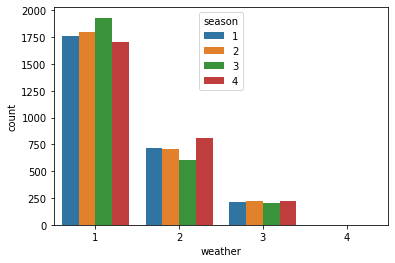

In [31]:
sns.countplot(x='weather',data=yulu,hue='season')

In [32]:
season_weather = pd.crosstab(index=yulu['season'],columns=yulu['weather'])
season_weather

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [33]:
chi_stat, p_value, dof, expected = chi2_contingency(season_weather)
alpha = 0.05 # testing the null hypothesis at 95% confidence level
print("chi_stat:",chi_stat)
print("p-value:",p_value)
if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")

chi_stat: 49.158655596893624
p-value: 1.549925073686492e-07
Reject H0
